In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
print("==============================")
print("|           실습 #1          |")
print("==============================")

# 데이터 셋 읽어들입니다.
data = pd.read_csv("lin_regression_data_03.csv", names=["age","height"])
print("데이터셋:\n",data)

|           실습 #1          |
데이터셋:
      age  height
0    9.9    18.3
1   14.0    23.5
2   11.8    20.6
3   14.9    23.6
4    8.7    17.0
5   12.8    23.6
6    8.0    15.5
7    8.3    17.0
8   14.7    24.3
9   11.2    21.7
10  12.7    22.5
11   8.6    17.8
12   7.1    15.3
13   6.5    15.0
14  13.6    21.9
15   8.9    19.3
16  14.1    22.9
17   5.2    12.7
18   5.1    12.9
19  13.9    23.9
20  14.3    23.9
21  11.5    21.7
22  12.8    23.9
23   9.8    18.8
24  14.3    23.1


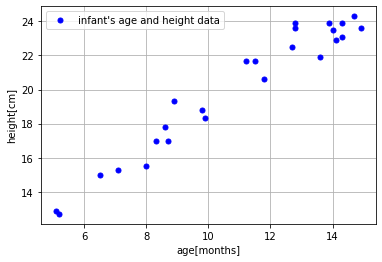

In [12]:
plt.plot(data["age"],data["height"], 'b.', markersize=10, label="infant's age and height data")
plt.xlabel("age[months]")
plt.ylabel("height[cm]")
plt.legend(loc="upper left")
plt.grid()
plt.show()

|           실습 #2          |


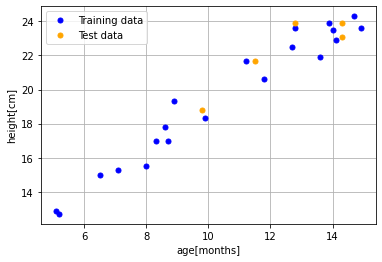

In [89]:
print("==============================")
print("|           실습 #2          |")
print("==============================")

# 훈련 세트와 테스트 세트 분리
train_set, test_set = data[:20], data[20:]

plt.plot(train_set["age"], train_set["height"], 'b.',markersize=10, label="Training data")
plt.plot(test_set["age"], test_set["height"], '.', color='orange',markersize=10, label="Test data")
plt.xlabel("age[months]")
plt.ylabel("height[cm]")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [134]:
print("==============================")
print("|           실습 #3          |")
print("==============================")

# 최대최소의 인덱스 나타내기 위해 선언
MINMAX_CONST = {
    "MIN" : 0,
    "MAX" : 1
}

# mu값 계산
# K값에 대해 배열을 반환, 각각의 값 미리 계산
# Train 데이터 마다 가지고 있는 min, max가 다르기에 각각의 값을 가져온다
def calc_mu(K, minmax):
    return [minmax[MINMAX_CONST["MIN"]] + (minmax[MINMAX_CONST["MAX"]] - minmax[MINMAX_CONST["MIN"]]) / (K - 1) * k for k in range(K)]

# sigma값 계산
# 고정된 값으로 하나의 상수
def calc_sigma(K, minmax):
    return (minmax[MINMAX_CONST["MAX"]] - minmax[MINMAX_CONST["MIN"]]) / (K-1)

# 가우스 계산
# x값 자체가 하나의 특성 데이터 전체로 들어옴
# mu는 각 배열의 원소들을 하나씩 넣어준다.
# x는 array, mu자체가 현재 k(새로운 특성)에 해당하는 값중 하나(기존 리스트에서 한개씩 함수로 전달받음) 
def calc_gauss(x, mu, sigma):
    return np.exp(-1/2 * ((x - mu)/sigma)**2)

# 각 특성마다 해당하는 mu값과 함께 가우스를 계산하여 배열에 추가
# result[i]는 각 특성 데이터 값이므로 np.array로 변환하여 T시켜
# 데이터마다 여러개의 특성을 뽑아올 수 있도록 변경
# result[0] = [특성1의 데이터1, 특성1의 데이터2] => [특성1, 특성2, 특성3 ...]  
def make_pi(x, K, mu, sigma):
    result = []
    for i in range(K):
        # 계산한 mu값은 리스트
        # mu0, mu1 mu2 ... 값을 하나하나 넣어준다.
        result.append(calc_gauss(x, mu[i], sigma))
    return np.array(result).T
    
# 가우시안 값을 구하기 위해 처음으로 호출하는 함수
def gaussian_func(K, x_data, minmax):
    # u_k = 평균, sigma = 표준편차
    mu = calc_mu(K, minmax) # mu값 구하는 함수 호출
    sigma = calc_sigma(K, minmax) # sigma값 구하는 함수 호출
    
    # 기본 데이터값을 변경하지 않기 위해 깊은 복사로 데이터 가져옴
    x_temp = x_data.copy()

    # pi 행렬을 구하는 함수
    pi = make_pi(x_temp,K, mu,sigma)
    
    # y_hat = bias + pi_0(x) + pi_1(x) + pi_2(x) 
    pi_b = np.c_[np.ones(len(x_data)), pi]
    return pi_b

|           실습 #3          |


In [98]:
k_list = [6,7,8,9,10,11,12,13]

train_minmax = [min(train_set["age"]), max(train_set["age"])]

train_pi_k_list = []
test_pi_k_list = []
for i in range(len(k_list)):
    train_pi_k_list.append(gaussian_func(k_list[i], train_set["age"], train_minmax))
    test_pi_k_list.append(gaussian_func(k_list[i], test_set["age"], train_minmax))    

In [99]:
# 가중치(theta)값 구하는 함수
def calc_pi_theta(pi, y):
    # pinv를 사용하여 해석해를 구했습니다.
    pi_t = pi.T
    return np.linalg.pinv(pi_t.dot(pi)).dot(pi_t).dot(y)

In [34]:
# train에 대한 theta값
theta_list = []
for i in range(len(k_list)):
    # 각각의 pi값에 대한 theta(가중치를) 리스트에 저장
    theta_list.append(calc_pi_theta(train_pi_k_list[i], train_pi_k_list["height"]))
    print("K = {}:[GD,(bias, 0,1,...)]:{}\n".format(k_list[i], theta_list[i]))

K = 6:[GD,(bias, 0,1,...)]:[19.51782248 -7.63501681  2.53206263 -4.28859078  3.87117628 -1.61529661
  4.74444806]

K = 7:[GD,(bias, 0,1,...)]:[21.12653219 -8.13201556  0.62082535 -3.30574573 -0.14898306  0.61214225
 -0.20214456  2.6501821 ]

K = 8:[GD,(bias, 0,1,...)]:[ 7.44399784  0.87106964  7.97408664 -4.72343518 14.68212759 -6.4467811
 17.61878216 -5.06058052 17.13554107]

K = 9:[GD,(bias, 0,1,...)]:[ 33.05474    -21.89483269   7.31964336 -21.0321158    5.87378214
 -14.76465843   1.47883791  -8.6565154    0.10144946  -7.92520385]

K = 10:[GD,(bias, 0,1,...)]:[ 22.95801065 -13.21203484   7.78936264 -13.44715153   5.27237485
  -6.80893693   2.12747233  -3.23277825   2.46104792  -2.16263329
   2.04727205]

K = 11:[GD,(bias, 0,1,...)]:[-14.89027091  24.61161006  -1.06569796  25.78720171  -4.01290625
  31.86053366  -6.60958517  35.39312291  -6.72730469  36.18333242
  -6.25729531  37.47028692]

K = 12:[GD,(bias, 0,1,...)]:[-6.18124615 19.25456643 -5.93405982 24.32761741 -8.21672434 25.16

In [100]:
print("==============================")
print("|           실습 #4          |")
print("==============================")
# mse값을 만드는 함수 y의 예측값과 y 원본 값, 데이터의 갯수를 받는다.
def calc_mse(y_pred, y_origin, size):
    return np.sqrt(sum((y_pred - y_origin) ** 2) / size)

|           실습 #4          |


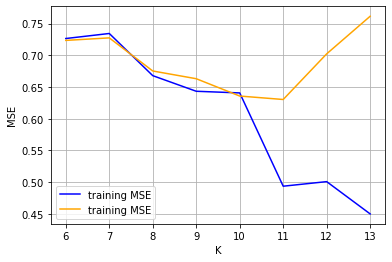

In [101]:
# 구한 mse 값을 저장하기 위한 리스트.
train_mse_list = []
test_mse_list = []

train_y_size = len(train_set["height"])
test_y_size = len(test_set["height"])
for i in range(len(k_list)):
    # 위에서 구한 pi값과 theta값을 사용하여 y 예측값을 구한다.
    train_y = train_pi_k_list[i].dot(theta_list[i])
    test_y = test_pi_k_list[i].dot(theta_list[i])
    
    # 저장한 y예측값과 실제 y값을 통해 mse를 구하기 위해
    # 위에서 선언한 mse구하는 함수 호출하여 mse값을 저장합니다.
    train_mse_list.append(calc_mse(train_y, train_set["height"], train_y_size))
    test_mse_list.append(calc_mse(test_y, test_set["height"],test_y_size))
    
plt.plot(k_list, train_mse_list, "b-", label="training MSE")
plt.plot(k_list, test_mse_list, "-", color="orange", label="training MSE")
plt.xlabel("K"); plt.ylabel("MSE")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [102]:
print("==============================")
print("|           실습 #5          |")
print("==============================")

# 임의의 숫자 생성르 위해
import random

split_num = 5
COLOR_DATA = "0123456789ABCDEF"

def make_color():
    # '#' + COLOR_DATA에서 6개를 랜덤으로 선택하여 값을 가져온다.
    return '#'+ ''.join([random.choice(COLOR_DATA) for _ in range(6)])
    
color_list = [make_color() for i in range(split_num)]
# st, nd, rd, th .... 
word_list = ["th" for _ in range(split_num)]
word_list[0] = "st"
word_list[1] = "nd"
word_list[2] = "rd"

|           실습 #5          |


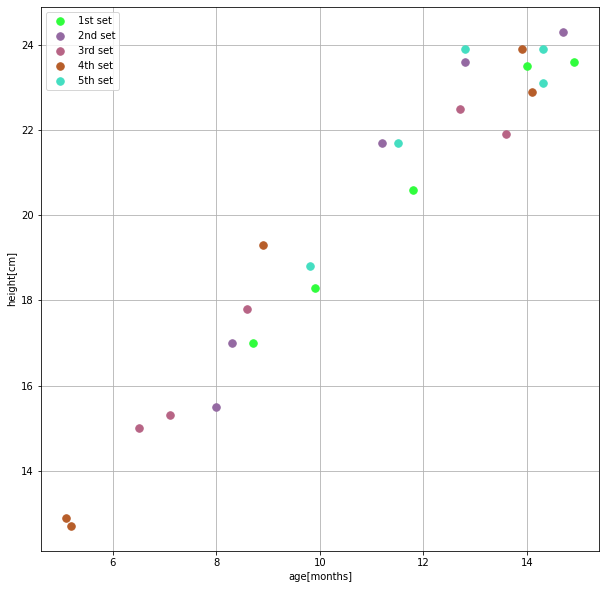

In [94]:
data_split_list = []

plt.figure(figsize=(10,10))
for i in range(split_num):
    data_split_list.append(data[split_num * i : split_num * (i+1)])
    
    plt.plot(data_split_list[i]["age"], data_split_list[i]["height"], '.', color=color_list[i], markersize=15, label="{}{} set".format(i+1, word_list[i]))
plt.xlabel("age[months]")
plt.ylabel("height[cm]")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [156]:
print("==============================")
print("|           실습 #6          |")
print("==============================")

XY_CONST = {
    "age" : 0,
    "height" : 1
}

K = 9
train_data_list = []
valid_data_list = []

# 가우시안을 통한 pi값
train_pi_list = []
valid_pi_list = []

# 가중치 : theta
theta_list = []

# mse
train_mse_list = []
valid_mse_list = []

def make_prac6():
    for i in range(split_num):
        v_data = np.array(data_split_list[i]).reshape(-1,2).T
        t_data = np.array(data_split_list[:i] + data_split_list[i+1:]).reshape(-1,2).T

        valid_data_list.append(v_data)
        train_data_list.append(t_data)

        minmax = [min(t_data[XY_CONST["age"]]), max(t_data[XY_CONST["age"]])]

        train_pi_list.append(gaussian_func(K, train_data_list[i][XY_CONST["age"]], minmax))
        valid_pi_list.append(gaussian_func(K, valid_data_list[i][XY_CONST["age"]], minmax))

        # train에 대한 theta, 가중치 
        theta_list.append(calc_pi_theta(train_pi_list[i], train_data_list[i][XY_CONST["height"]]))

        # 위에서 구한 pi값과 theta값을 사용하여 y 예측값을 구한다.
        train_y = train_pi_list[i].dot(theta_list[i])
        valid_y = valid_pi_list[i].dot(theta_list[i])

        # 저장한 y예측값과 실제 y값을 통해 mse를 구하기 위해
        # 위에서 선언한 mse구하는 함수 호출하여 mse값을 저장합니다.
        train_mse_list.append(calc_mse(train_y, t_data[XY_CONST["height"]], len(train_y)))
        valid_mse_list.append(calc_mse(valid_y, v_data[XY_CONST["height"]], len(valid_y)))
        print("매개변수 : {}, 일반화 오차 : {}".format(theta_list[i],valid_mse_list[i]))
    
make_prac6()

|           실습 #6          |
매개변수 : [ 33.96748624 -23.27773784   8.46036298 -22.82681943   5.92008981
 -13.70476057  -1.92170106  -4.4006918   -4.09937563  -6.4250132 ], 일반화 오차 : 1.3630868331643324
매개변수 : [19.22266449 -8.95992641  6.05043947 -9.33234679  5.83480926 -3.33087033
 -0.31618698  4.52856969 -1.88903723  5.00044914], 일반화 오차 : 0.9090198660755187
매개변수 : [ 57.87225316 -42.45075815   4.27465609 -36.68523632   1.22808137
 -30.16935684  -1.69319305 -27.44140133   2.73127103 -31.63690077], 일반화 오차 : 1.1965724100603325
매개변수 : [-23.04483409  38.594979   -10.01758909  41.86303039 -11.20861564
  46.91526877 -10.57723163  46.04739466  -9.52523718  46.23936352], 일반화 오차 : 12.38849305793765
매개변수 : [ 33.05474    -21.89483269   7.31964336 -21.0321158    5.87378214
 -14.76465843   1.47883791  -8.6565154    0.10144946  -7.92520385], 일반화 오차 : 0.6630958958264767


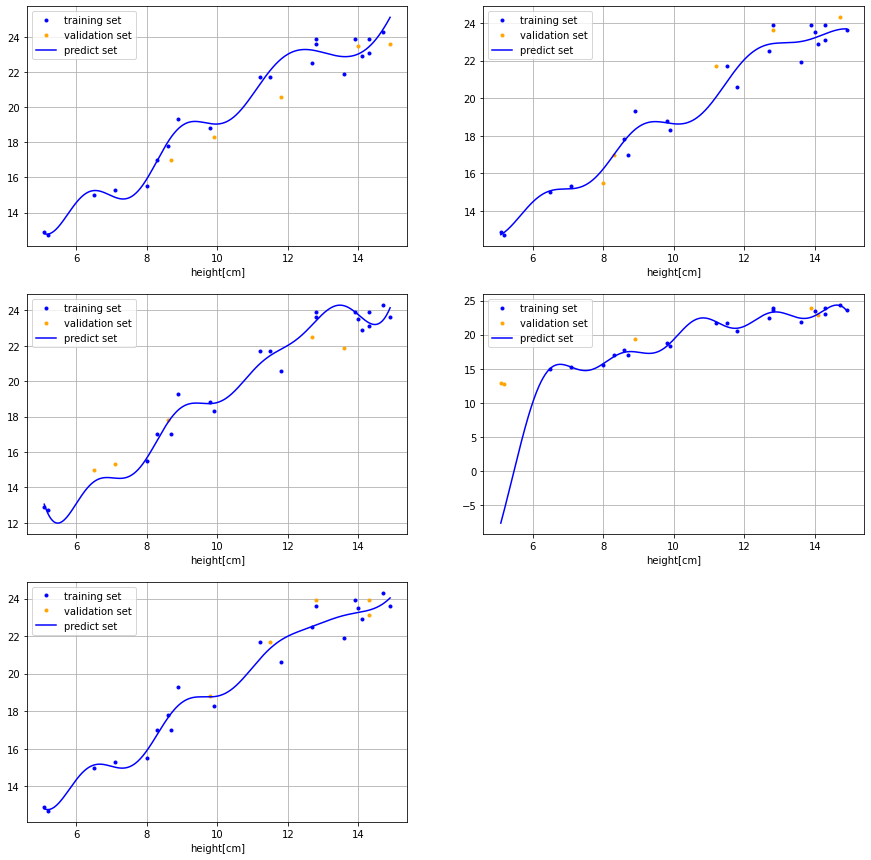

In [157]:
def make_prac7():
    plt.figure(figsize=(15,15))
    for i in range(split_num):
        plt.subplot(321+ i)
        plt.plot(train_data_list[i][XY_CONST["age"]], train_data_list[i][XY_CONST["height"]], 'b.', label="training set")
        plt.plot(valid_data_list[i][XY_CONST["age"]], valid_data_list[i][XY_CONST["height"]], '.', color="orange", label="validation set")
        
        #minmax_all = [min(data["age"]), max(data["age"])]
        minmax = [min(train_data_list[i][XY_CONST["age"]]), max(train_data_list[i][XY_CONST["age"]])]
        
        x_lin = np.linspace(min(data["age"]), max(data["age"]), 1000)
        x_pi = gaussian_func(K, x_lin, minmax)
        
        y_hat = x_pi.dot(theta_list[i])
        
        plt.plot(x_lin, y_hat, 'b-', label="predict set")
        
        
        plt.xlabel("age[months]")
        plt.xlabel("height[cm]")
        plt.grid(True)
        plt.legend(loc="upper left")
    
make_prac7()